In [19]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from xgboost import XGBClassifier

In [20]:
# load the dataset
train = pd.read_csv('../data/raw/train.csv')
print('Train shape {}'.format(train.shape))

Train shape (4250, 20)


In [21]:
train_new=train.head(1000)
train_new.to_csv('../data/raw/train_new.csv',index=False)

In [22]:
# display the all columns 
pd.set_option('display.max_columns',None)

## Data Exploration 

In [23]:
# Display the head of the data
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [24]:
# Checking the missing values 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

* There are not missing values in any features.

In [25]:
# describe the five points of statistics of numericals data
train.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [26]:
# Describe the string data
train.describe(include='O')

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


### Univariate Analysis

#### 1. Categorical Variables

In [27]:
# function for display the percentage
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

In [28]:
# extract the categorical variables
cat_var = [ feature for feature in train.columns if train[feature].dtypes=='O']
print('List of categorical variables {}'.format(cat_var))

List of categorical variables ['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn']


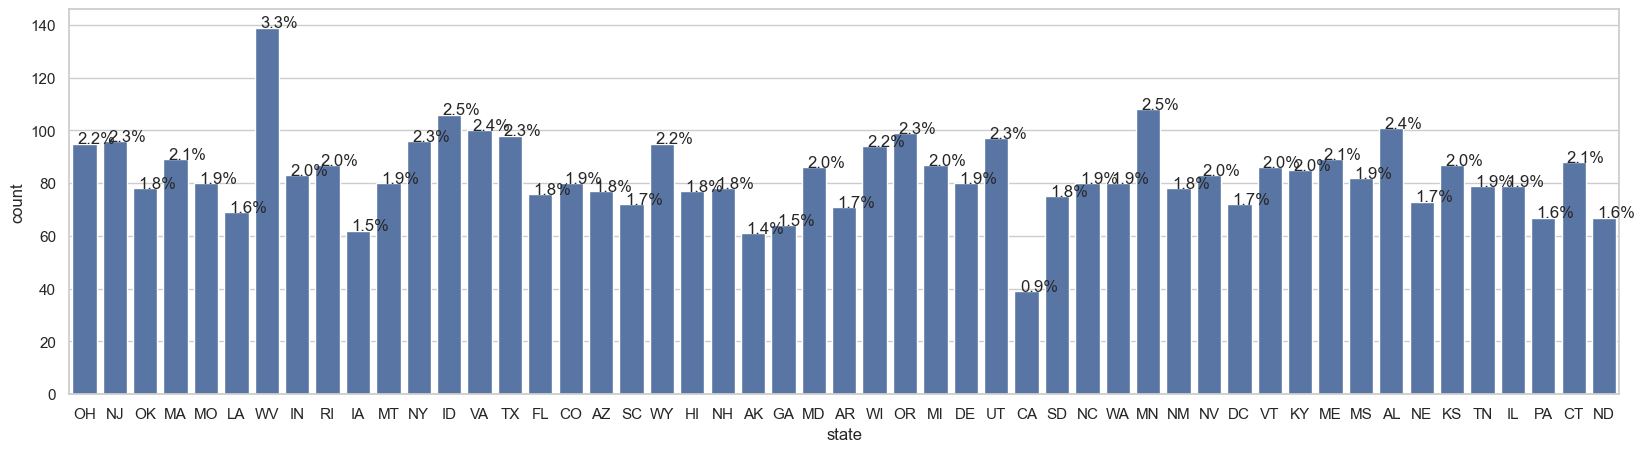

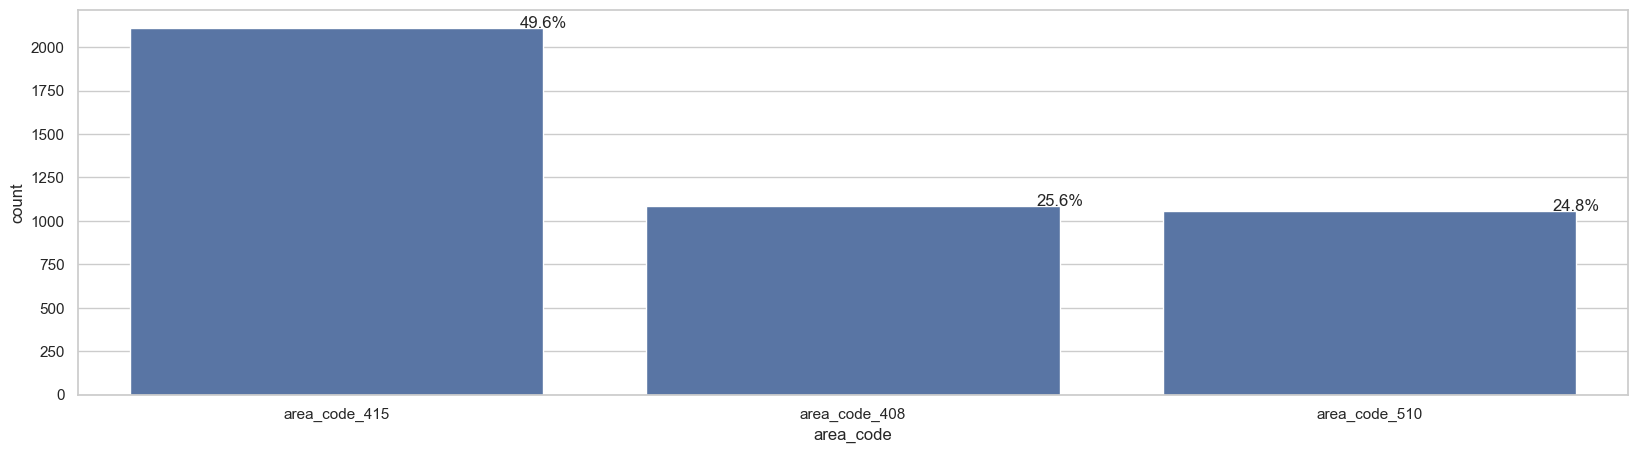

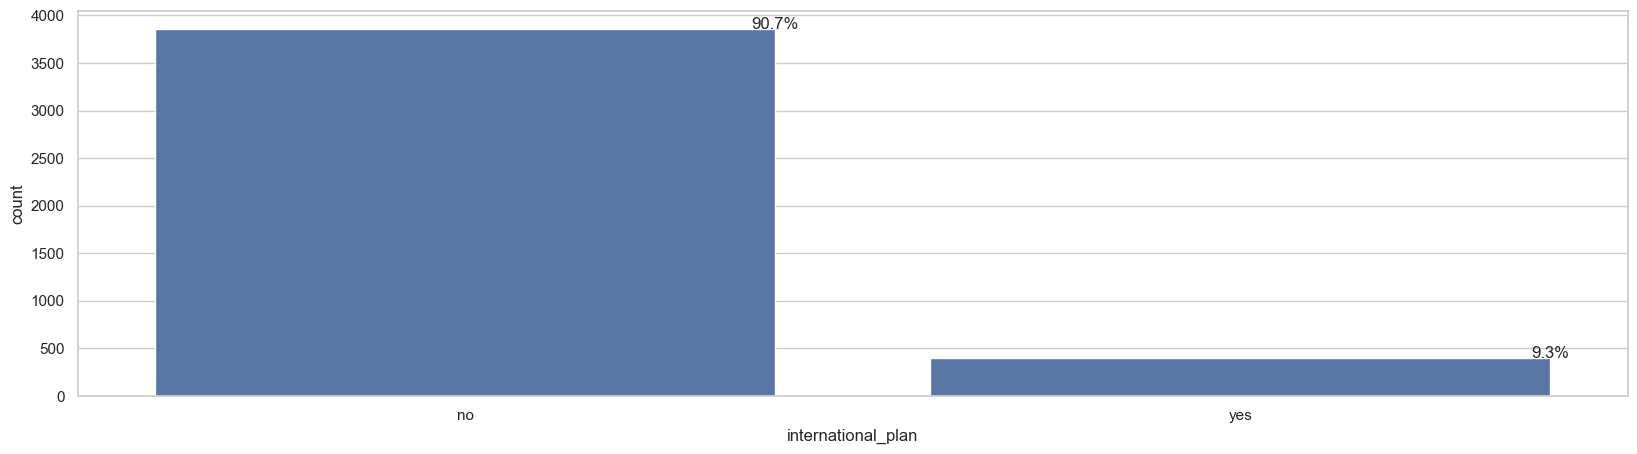

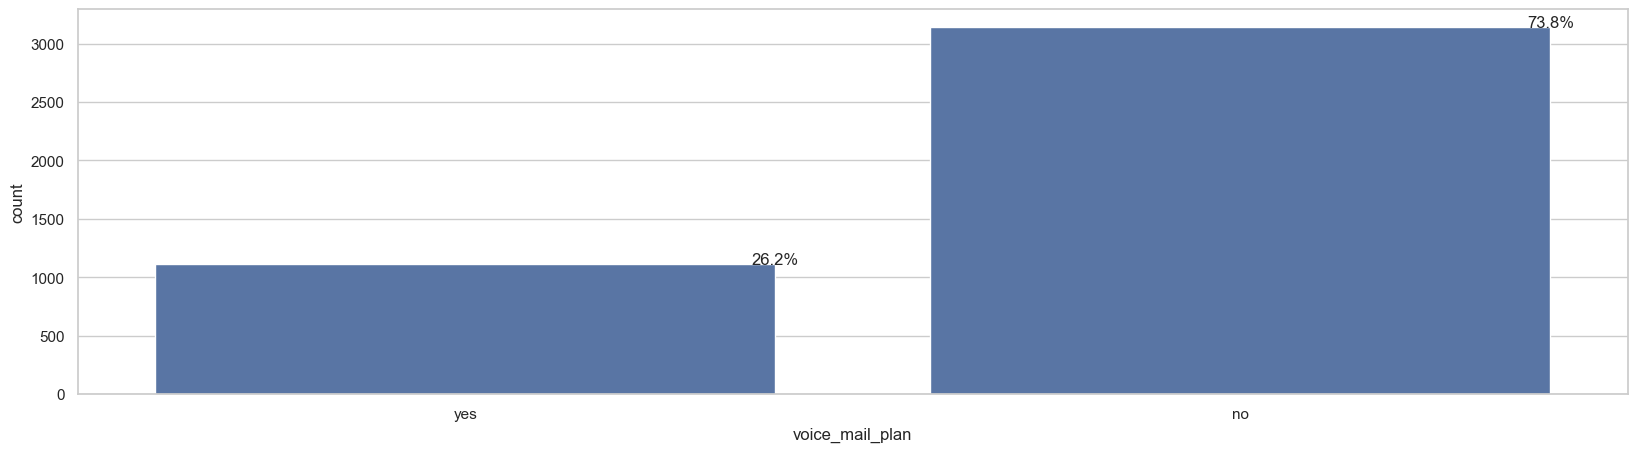

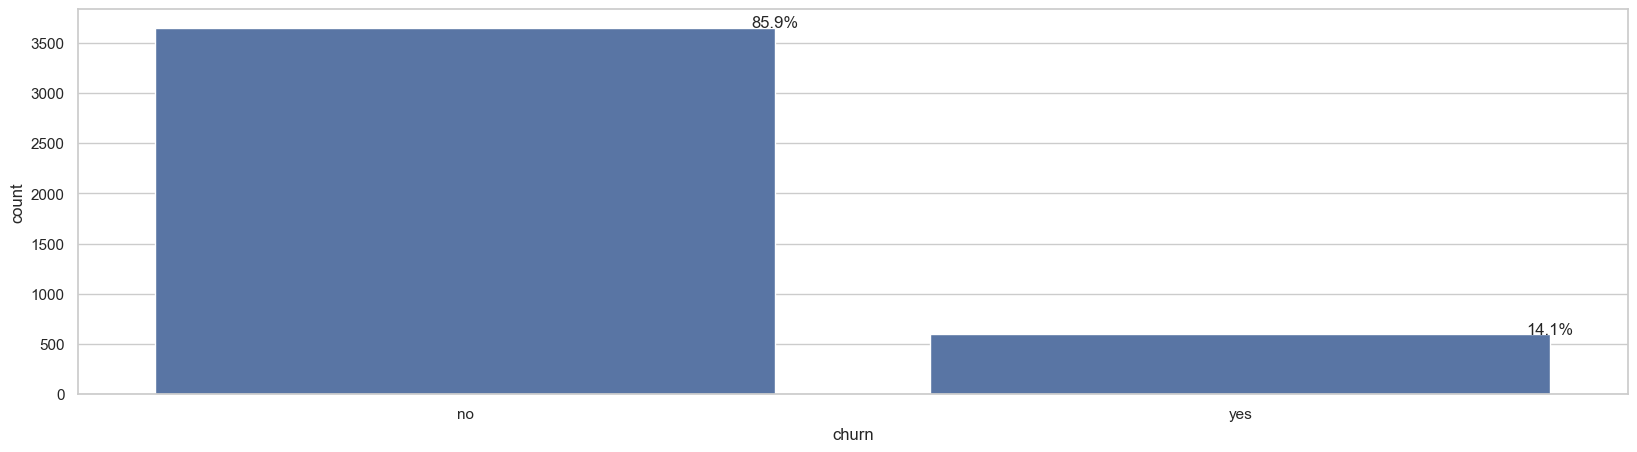

In [29]:
#display the all the categorical variable 
for feature in cat_var:
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,5))
    total = len(train)
    ax = sns.countplot(x = train[feature], data = train)
    #plt.title(feature)
    with_per(total, ax)
    plt.show()

* See the above plot
* 1. 90.7% customers didn't have international plan
* 2. 73.8%  customers didn't have voice mail plan
* 3. 49.6% customers are living in the area code area_code_415.
* 4. only 14.1% customers are churn

#### 2. Numerical Variables


In [30]:
#Extract the numerical features from the dataset
num_var = [feature for feature in train.columns if train[feature].dtypes != 'O']
print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [31]:
['number_vmail_messages','total_day_calls','total_eve_minutes','total_eve_charge','total_intl_minutes','number_customer_service_calls']

['number_vmail_messages',
 'total_day_calls',
 'total_eve_minutes',
 'total_eve_charge',
 'total_intl_minutes',
 'number_customer_service_calls']

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\1366469016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


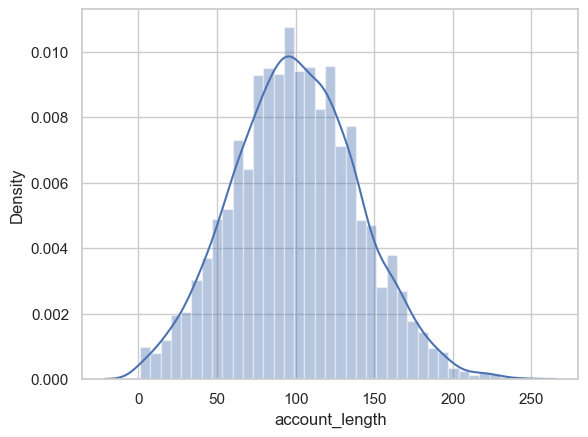

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\1366469016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


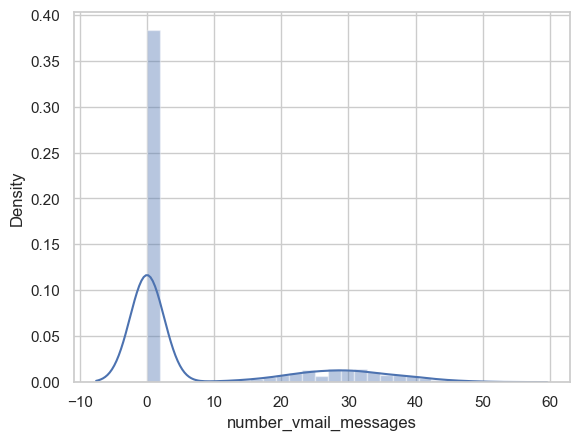

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\1366469016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


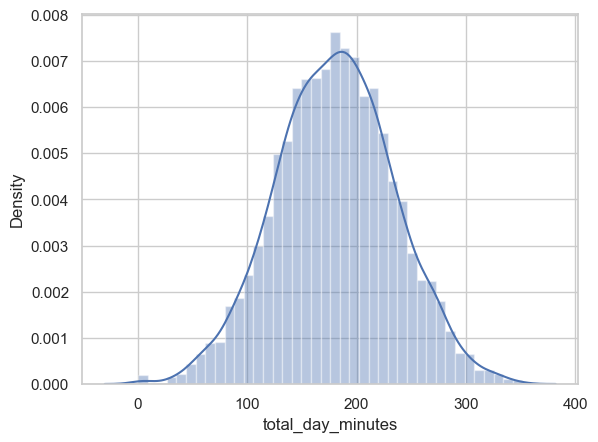

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\1366469016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


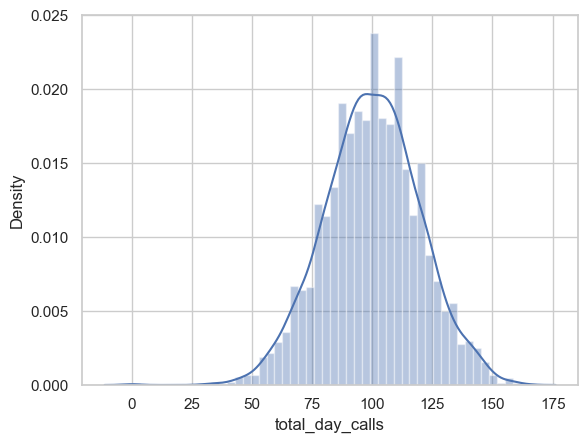

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\1366469016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


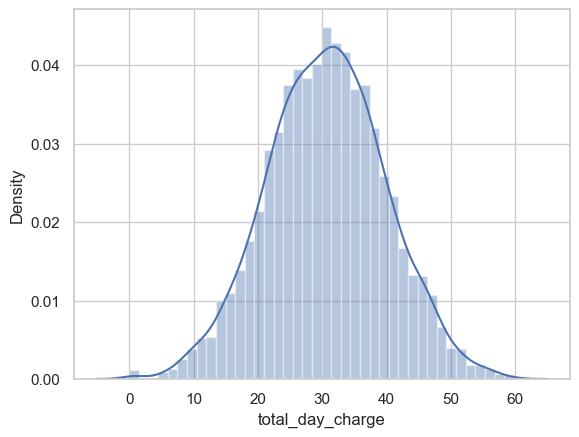

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\1366469016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


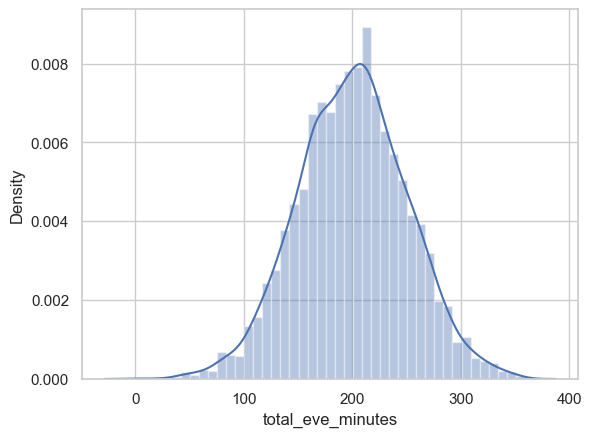

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\1366469016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


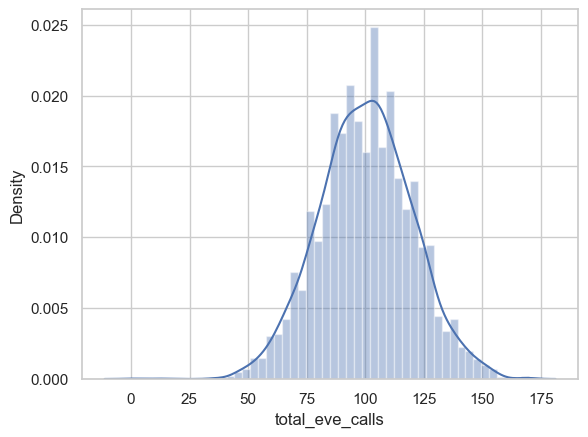

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\1366469016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


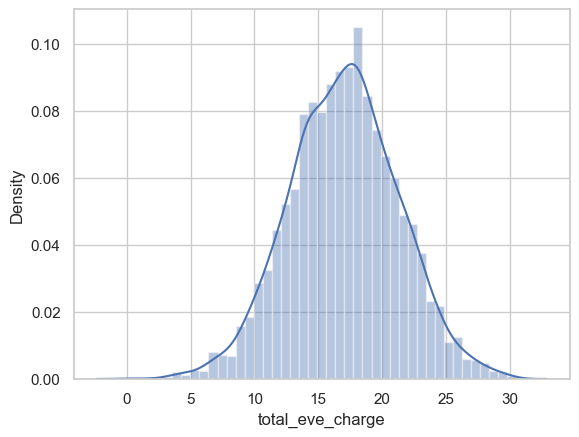

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\1366469016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


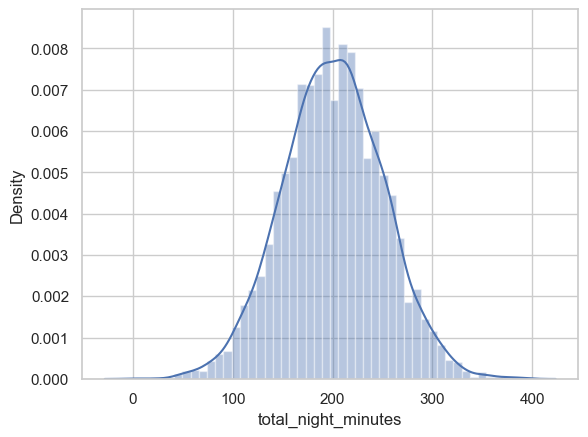

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\1366469016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


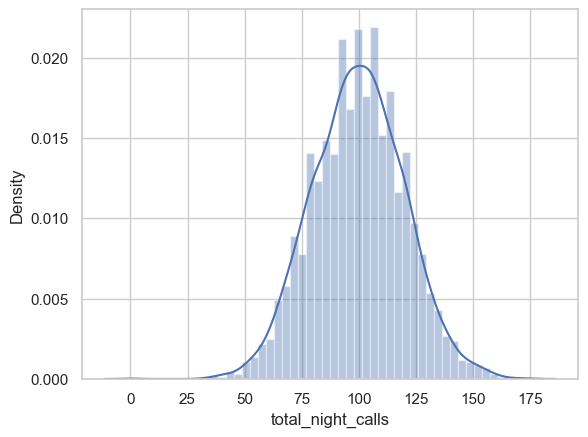

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\1366469016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


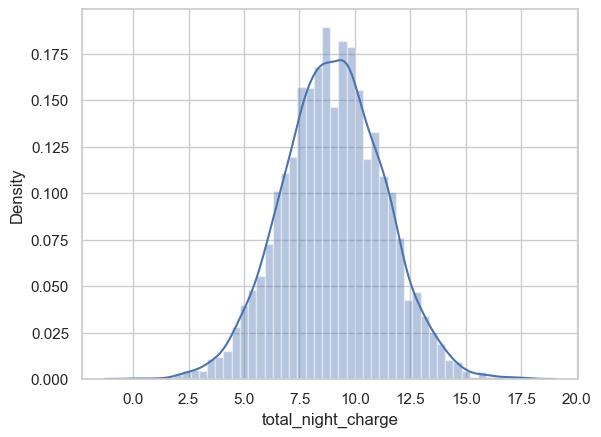

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\1366469016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


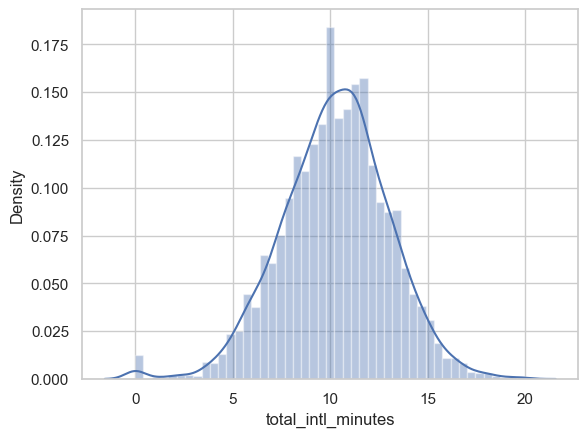

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\1366469016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


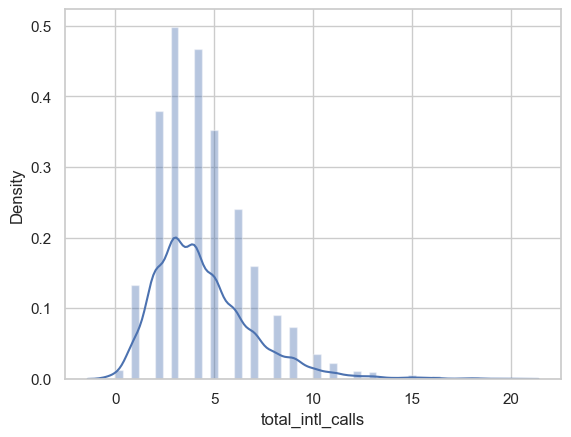

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\1366469016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


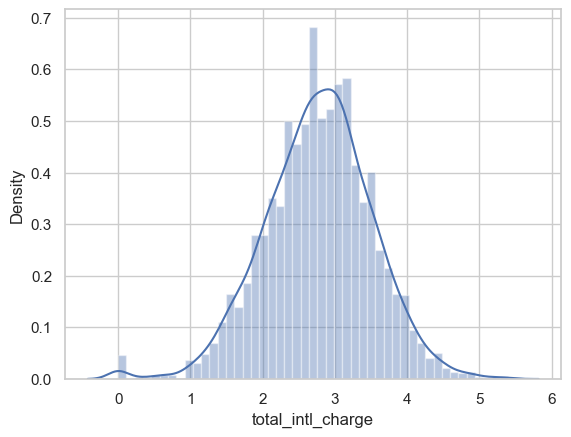

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\1366469016.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train[feature])


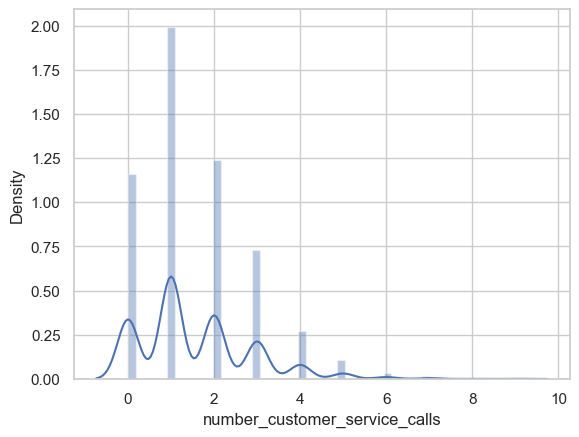

In [32]:
# Density plot of all the numerical features
for feature in num_var:
    sns.distplot(train[feature])
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

* 1. Number_customer_service_calls, total_internation_call and Number_voice_mail_messages are not a normal distribuation so we can covert into normal distribution in featuer engineering step.
* 2. Other than the obove features all look like a normal distribuation.

### BiVariate Analysis

#### 1. Countinous Features

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


Text(0.5, 1.0, 'Churn rate VS account_length')

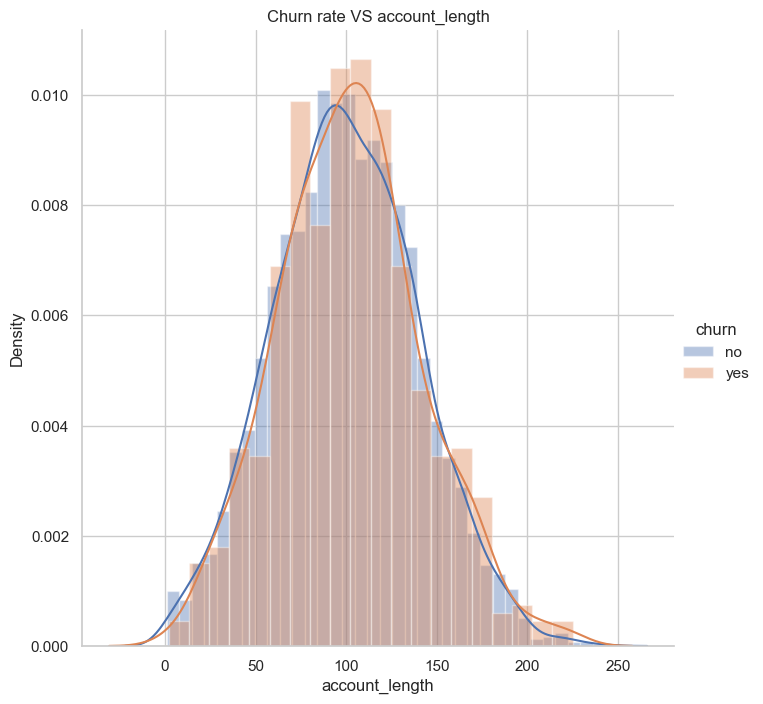

In [34]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'account_length').add_legend()
plt.title('Churn rate VS account_length')

* customers account length between 60 to 120 has more churn rate

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


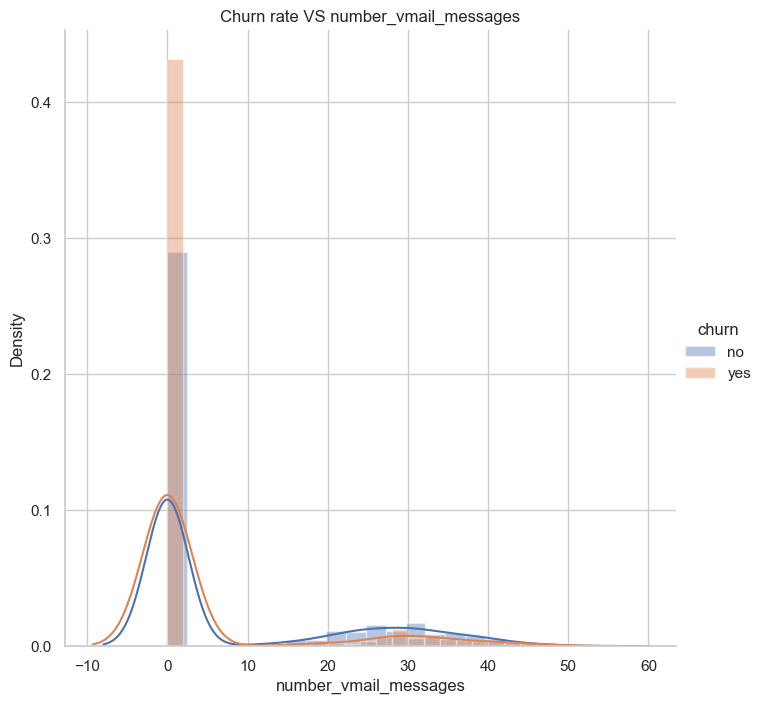

In [35]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'number_vmail_messages').add_legend()
plt.title('Churn rate VS number_vmail_messages')
plt.show()

* More churn rate when the number_vamil_messages is 0

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


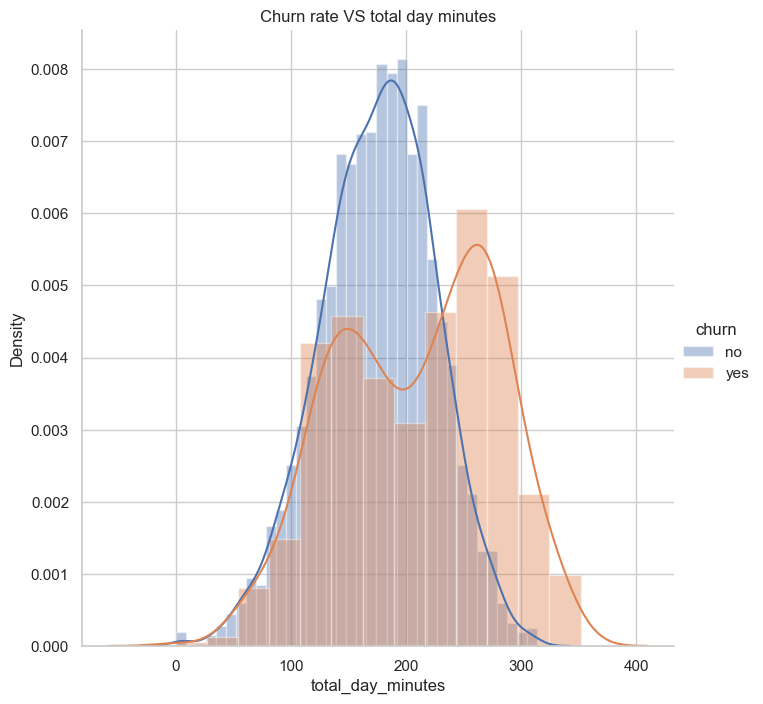

In [36]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'total_day_minutes').add_legend()
plt.title('Churn rate VS total day minutes')
plt.show()

* Churn rate is high when the total_day_minutes is lies between 210 min to 300 min.

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


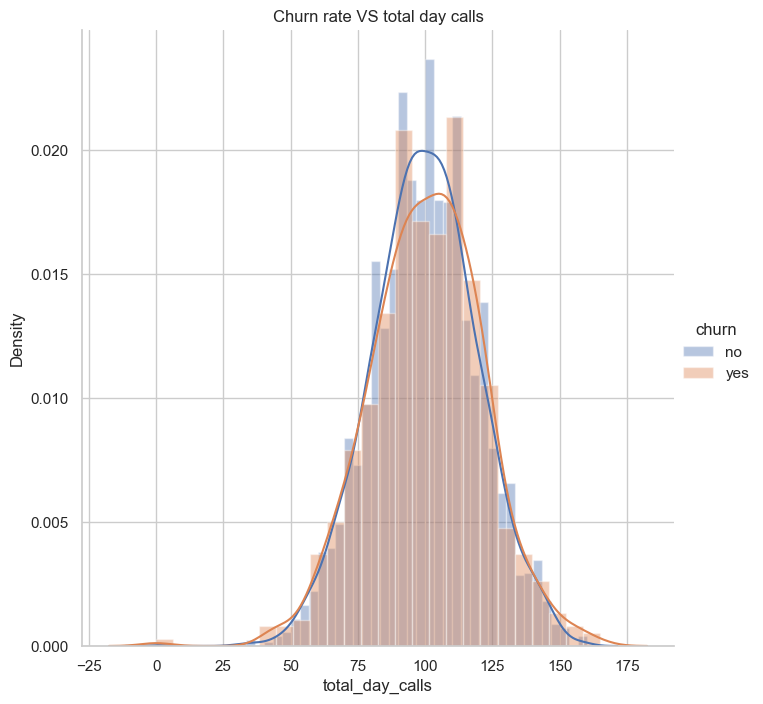

In [37]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'total_day_calls').add_legend()
plt.title('Churn rate VS total day calls')
plt.show()

* churn rate is high lies between 85 to 115.

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


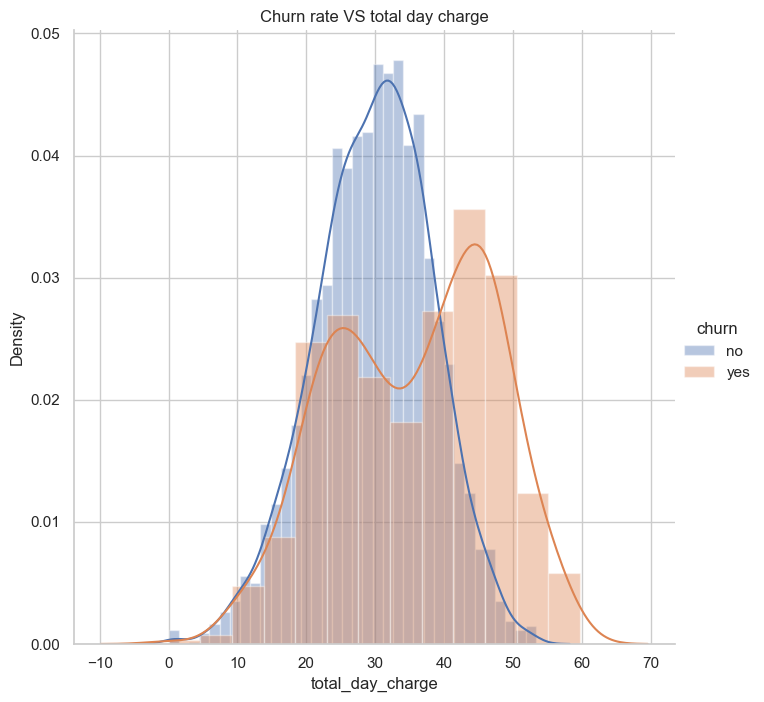

In [38]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'total_day_charge').add_legend()
plt.title('Churn rate VS total day charge')
plt.show()

* churn rate is high when total day charge is lies between 40 to 50.

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


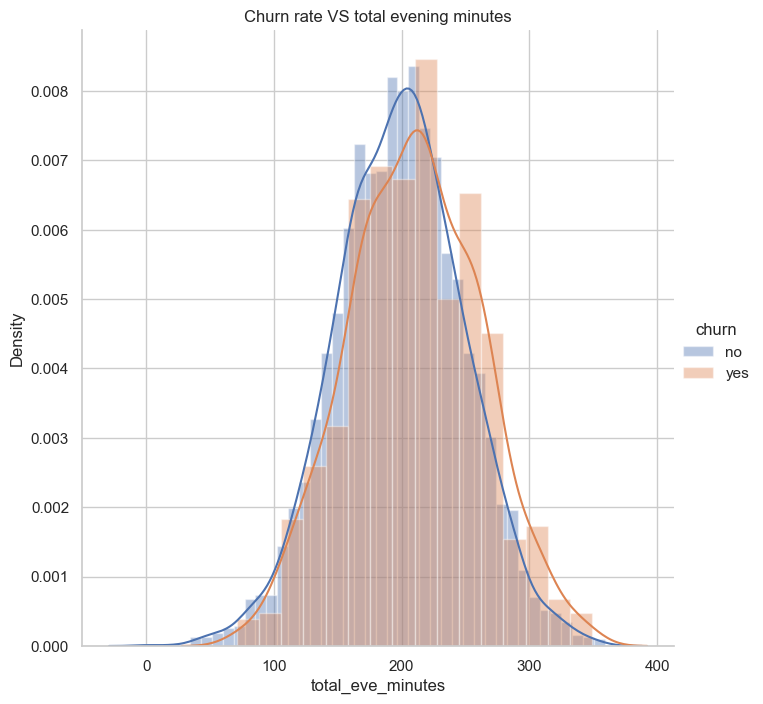

In [39]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'total_eve_minutes').add_legend()
plt.title('Churn rate VS total evening minutes')
plt.show()

* churn rate is high when the total evening minutes is lies between 180 min to 220 min.

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


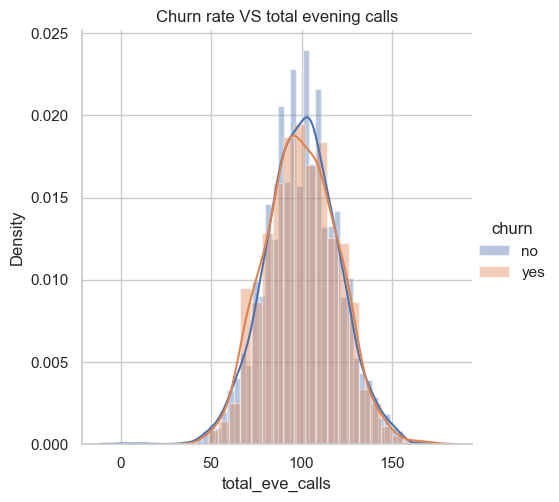

In [40]:
sns.FacetGrid(train, hue='churn',height=5).map(sns.distplot, 'total_eve_calls').add_legend()
plt.title('Churn rate VS total evening calls')
plt.show()

* churn rate is high when total evening calls lies between 90 to 115.

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


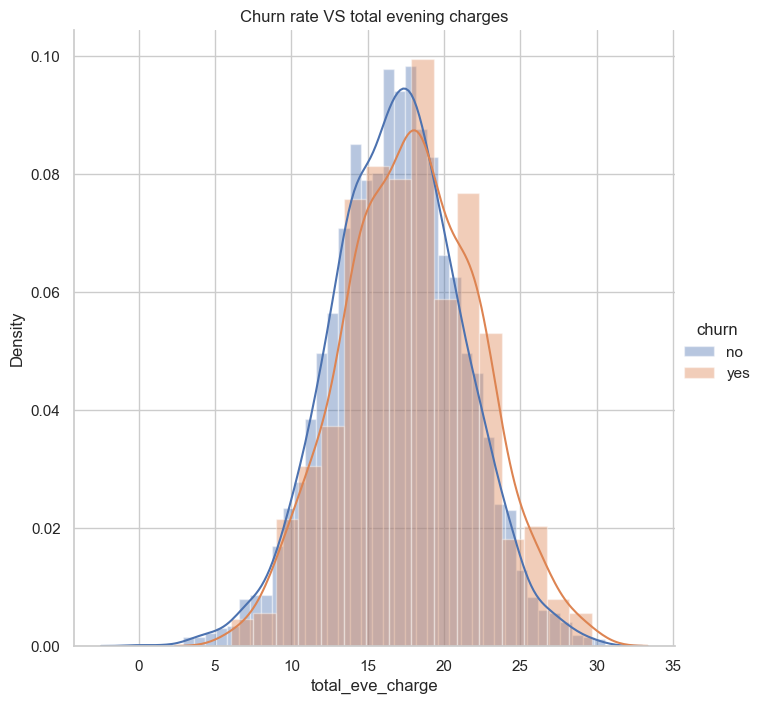

In [41]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'total_eve_charge').add_legend()
plt.title('Churn rate VS total evening charges')
plt.show()

* churn rate is high when the total evening charge is lies between 15 to 18

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


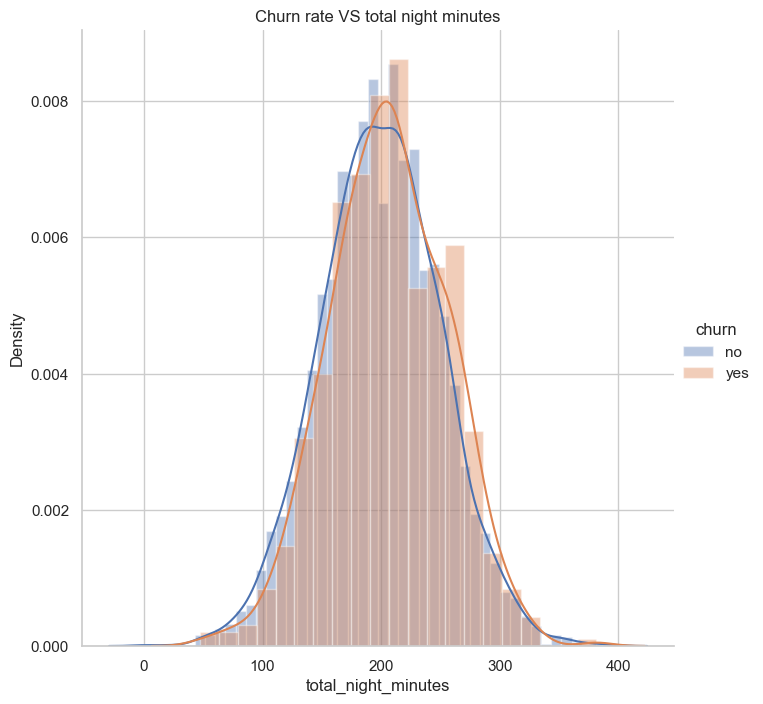

In [42]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'total_night_minutes').add_legend()
plt.title('Churn rate VS total night minutes')
plt.show()

* Churn rate is high when the total_night_minutes is lies between 190 to 220 min

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


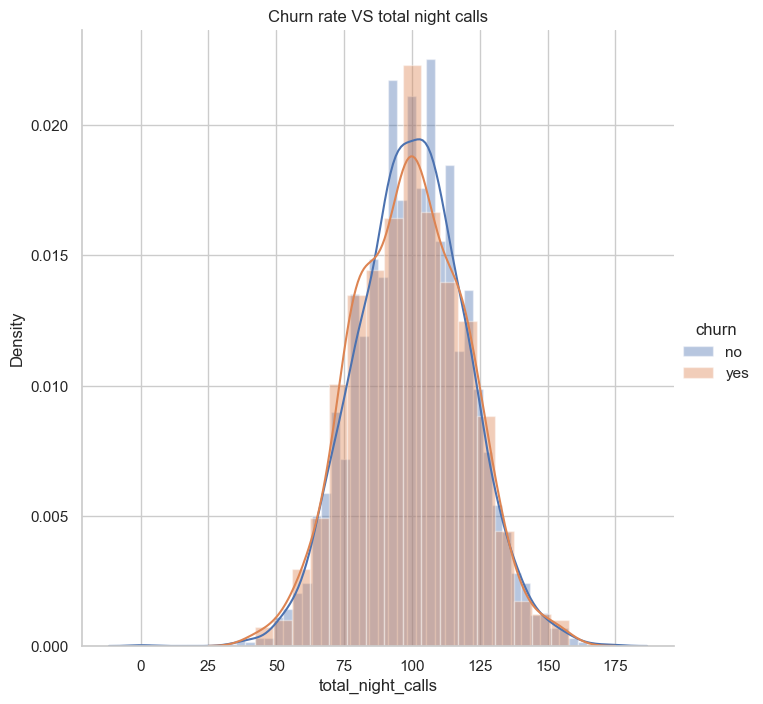

In [43]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'total_night_calls').add_legend()
plt.title('Churn rate VS total night calls')
plt.show()

* churn rate is high when total_nigh_calls lies between 90 to 110.

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


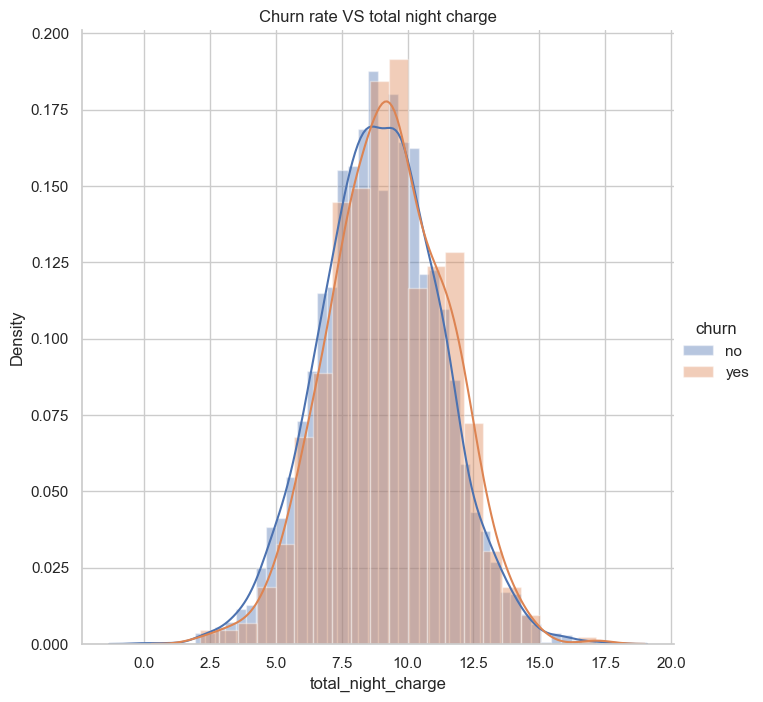

In [44]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'total_night_charge').add_legend()
plt.title('Churn rate VS total night charge')
plt.show()

* churn rate is high when total_night_charge lies between 7.5 to 10.

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


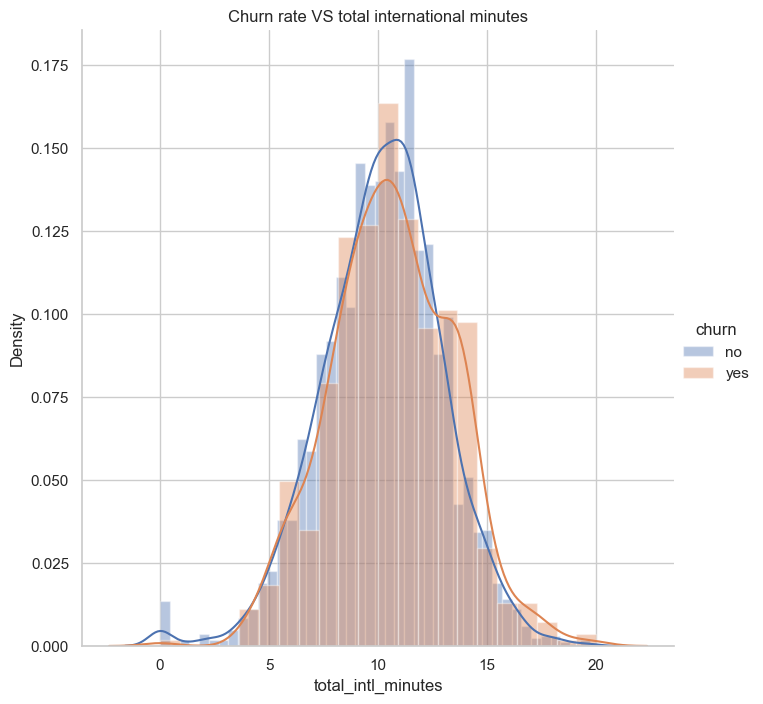

In [45]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'total_intl_minutes').add_legend()
plt.title('Churn rate VS total international minutes')
plt.show()

* churn rate is high when total international minutes lies between 9 to 12.

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


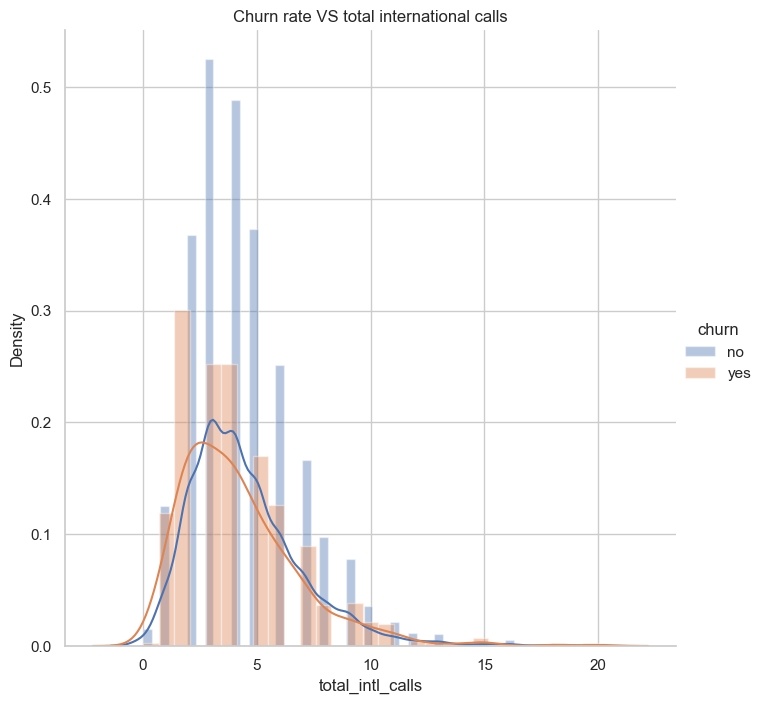

In [46]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'total_intl_calls').add_legend()
plt.title('Churn rate VS total international calls')
plt.show()

* churn rate is high when total international calls is 1.

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


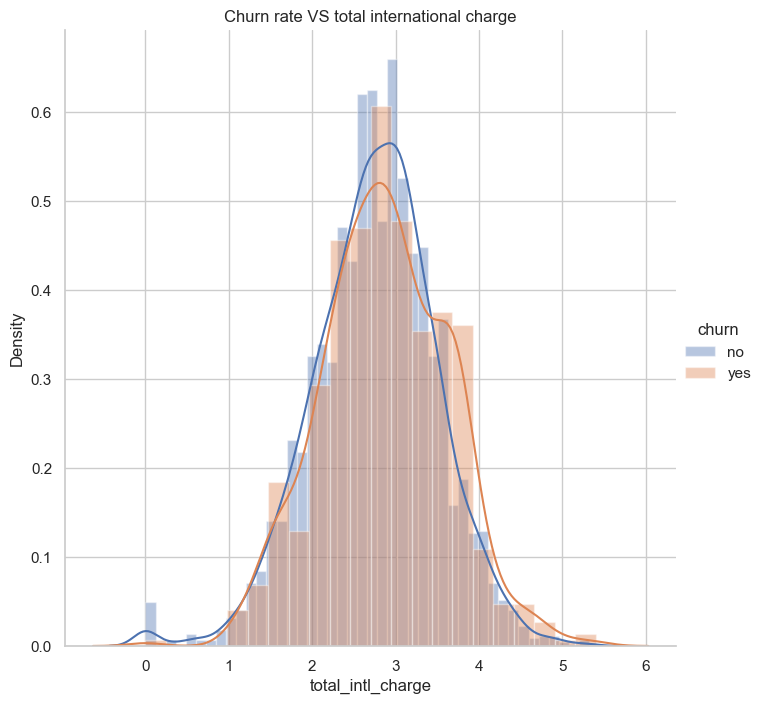

In [47]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'total_intl_charge').add_legend()
plt.title('Churn rate VS total international charge')
plt.show()

* churn rate is high when total international charge is 2.5 to 3.

c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Python312\Lib\site-packages\seaborn\axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


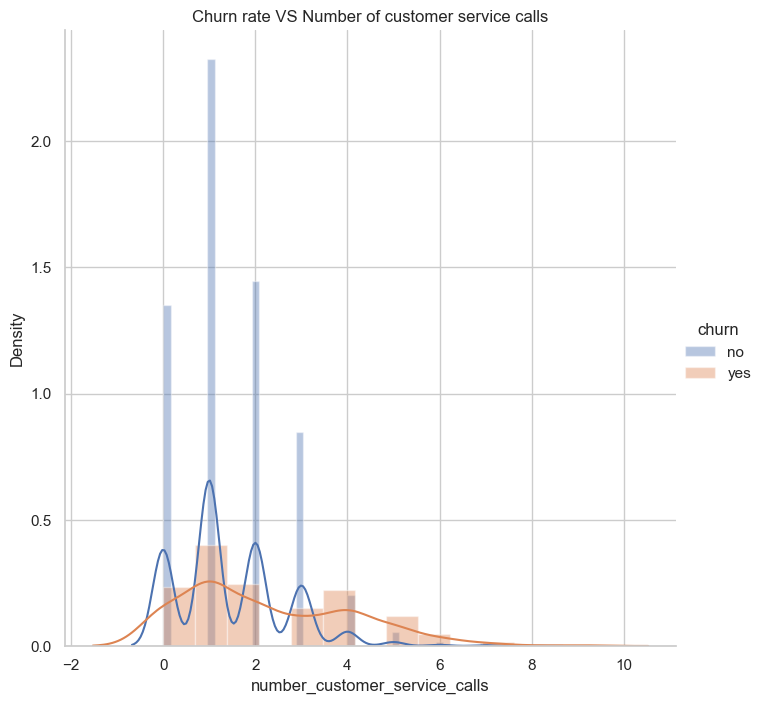

In [48]:
sns.FacetGrid(train, hue='churn',height=7).map(sns.distplot, 'number_customer_service_calls').add_legend()
plt.title('Churn rate VS Number of customer service calls')
plt.show()

* churn rate is high when number of customer service calls is 1.

### Outlier Detection

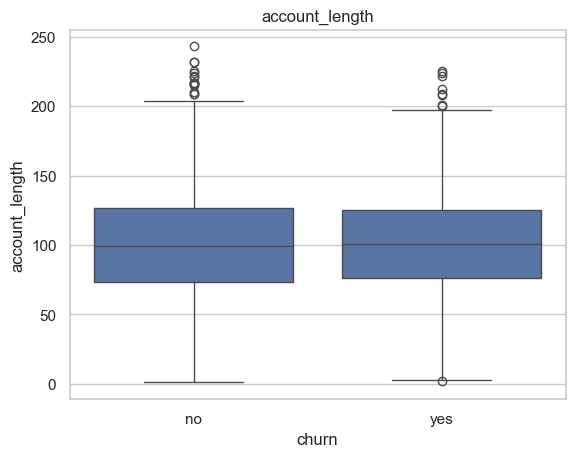

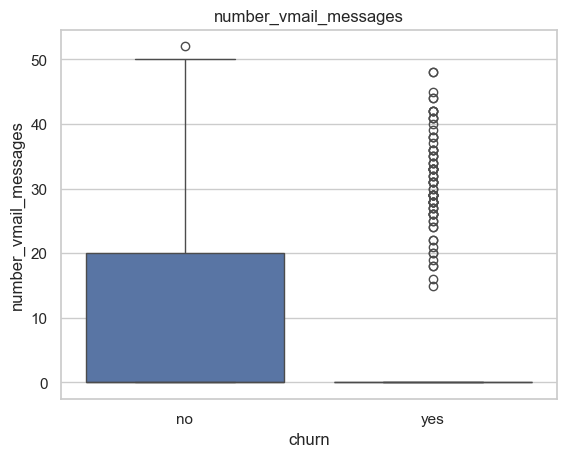

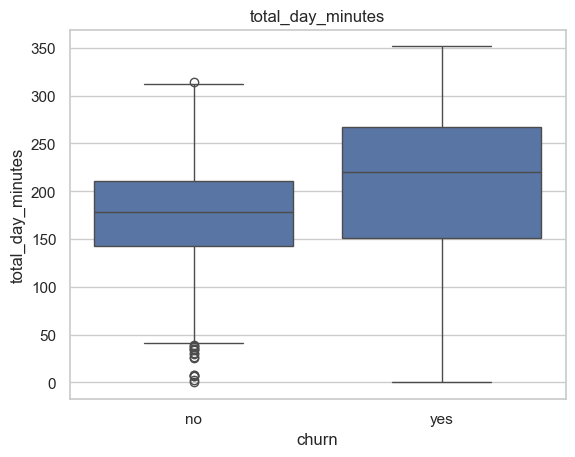

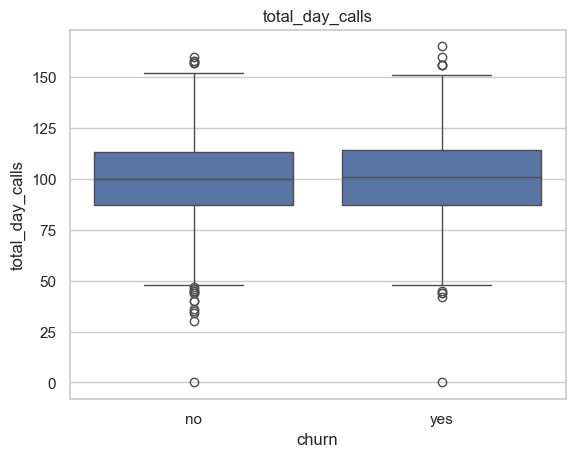

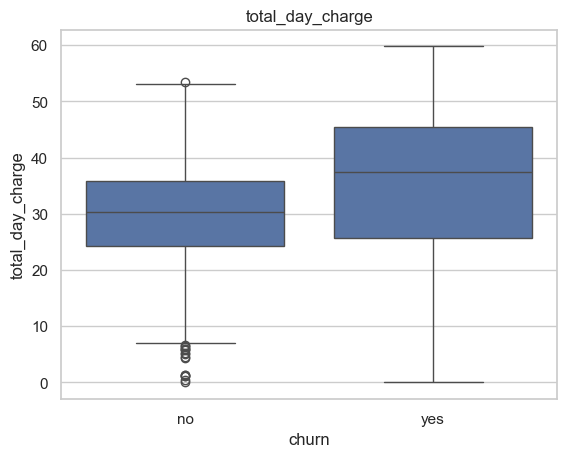

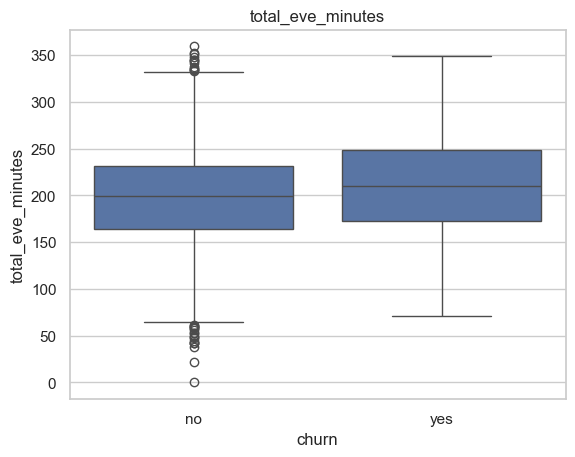

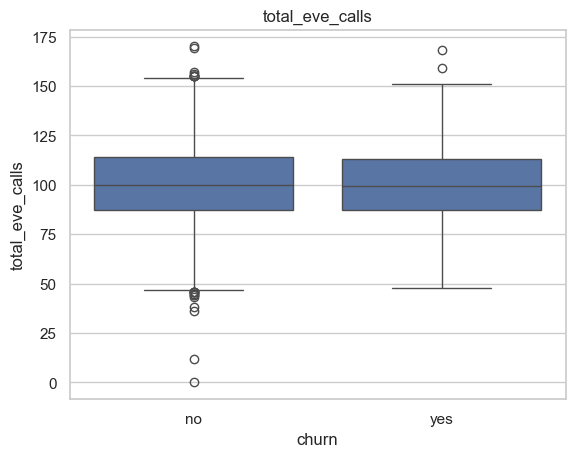

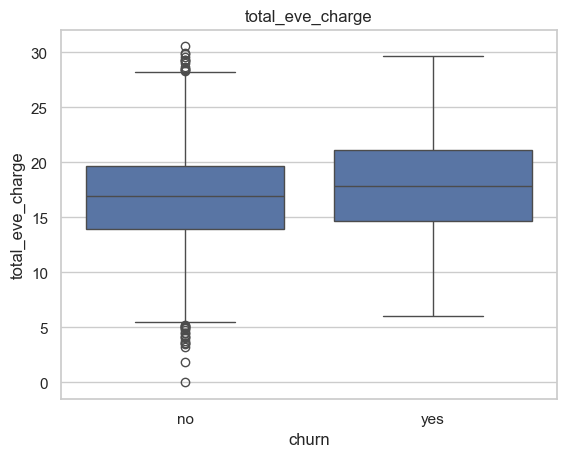

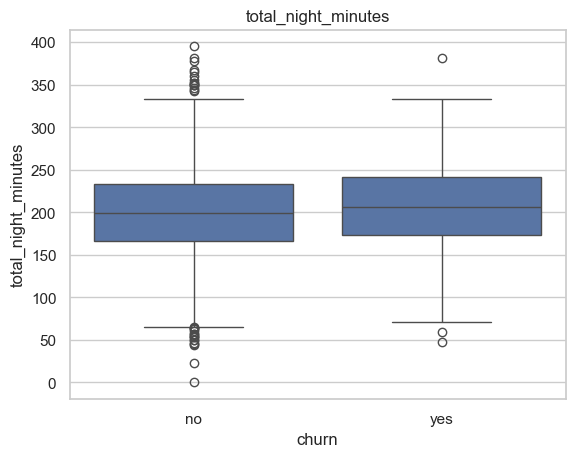

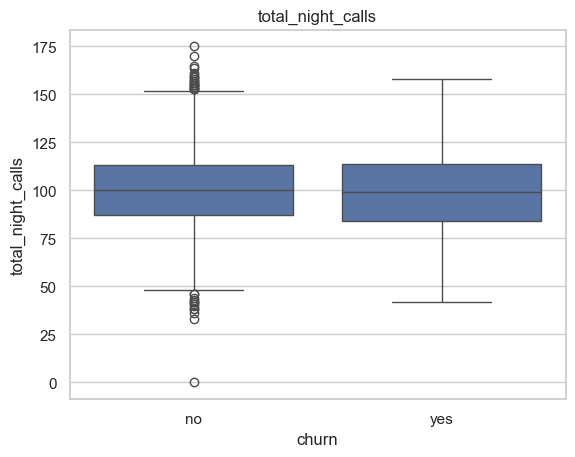

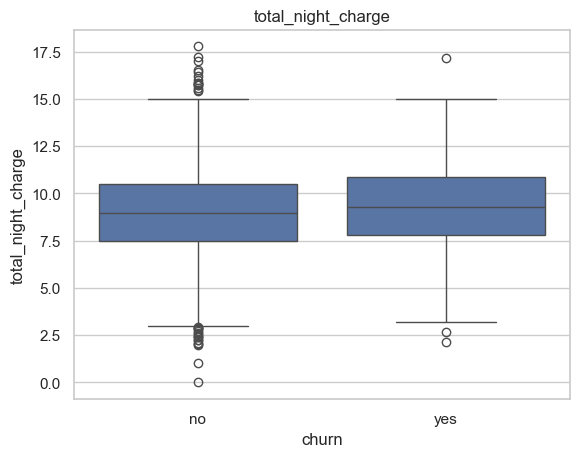

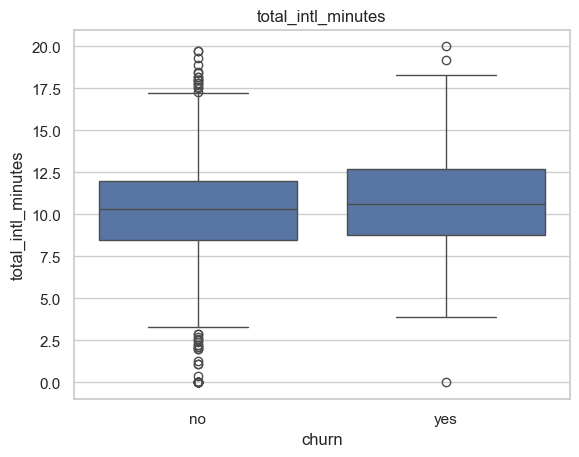

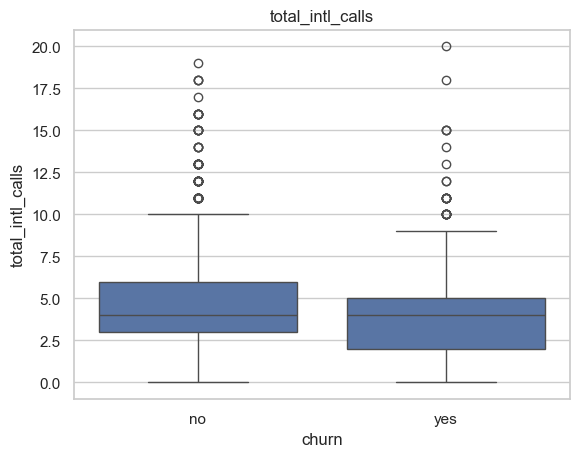

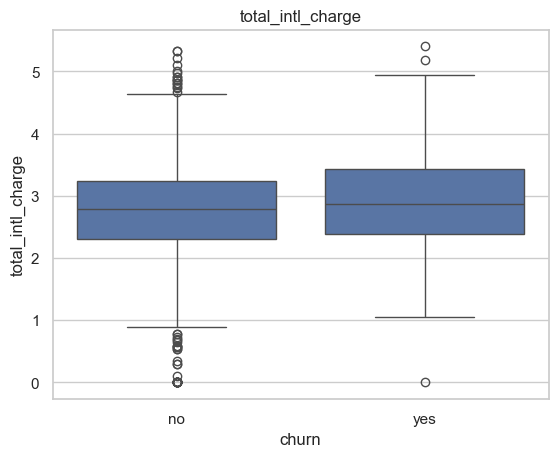

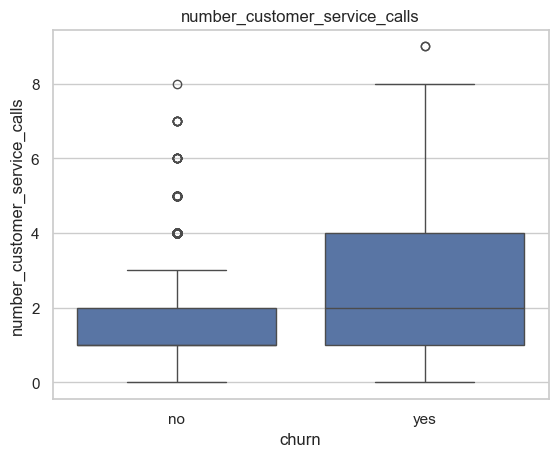

In [49]:
for feature in num_var:
    if feature != 'churn':
        sns.boxplot(x ='churn', y = feature, data = train)
        plt.title(feature)
        plt.show()

* every features has a outliers so we need to remove the outliers.
* outlies contains the some usefull information.
* so we have to replace the outliers with some meaning full values. so we should replace the outliers with meadin values

#### Removing the outliers

In [50]:
#functions for removing outliers
def remove_outliers(train,labels):
    for label in labels:
        q1 = train[label].quantile(0.25)
        q3 = train[label].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        train[label] = train[label].mask(train[label]< lower_bound, train[label].median(),axis=0)
        train[label] = train[label].mask(train[label]> upper_bound, train[label].median(),axis=0)

    return train

In [51]:
train = remove_outliers(train, num_var)

* after removing the outliers we have to see the outliers

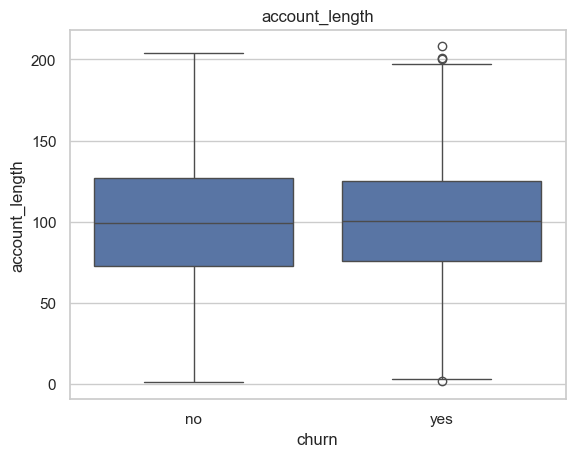

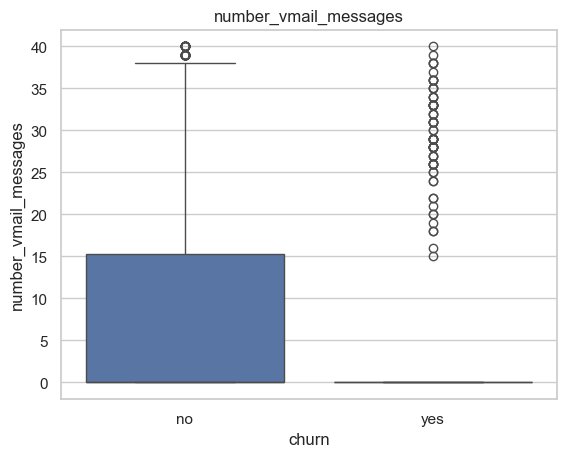

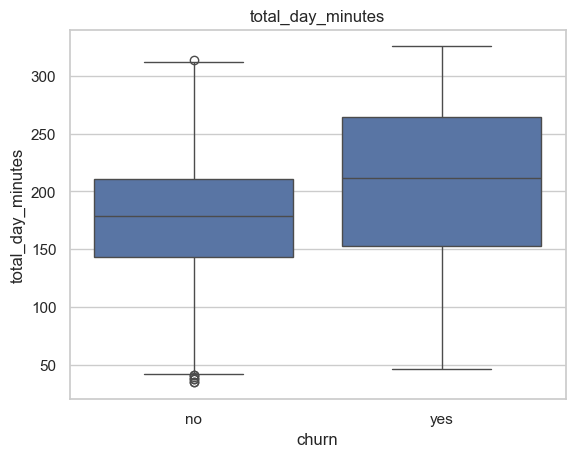

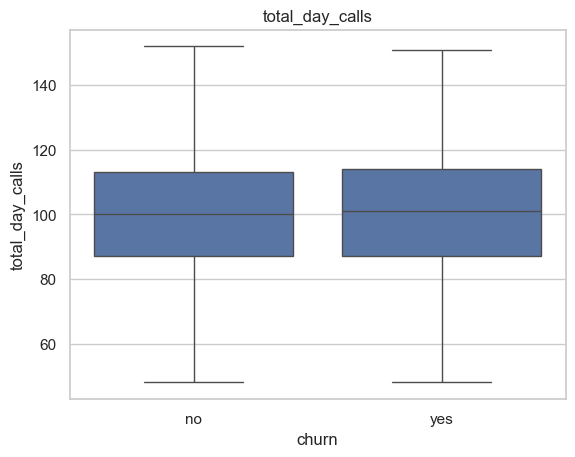

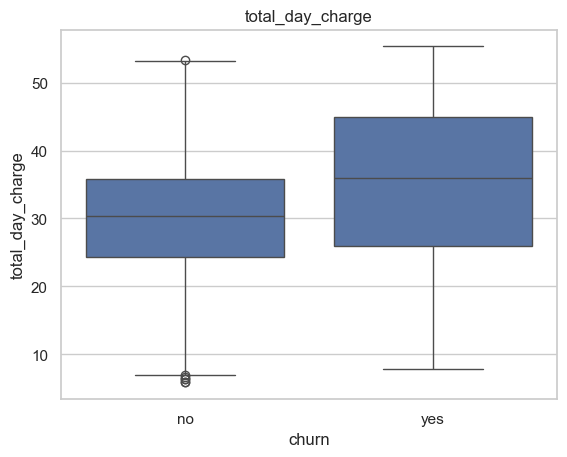

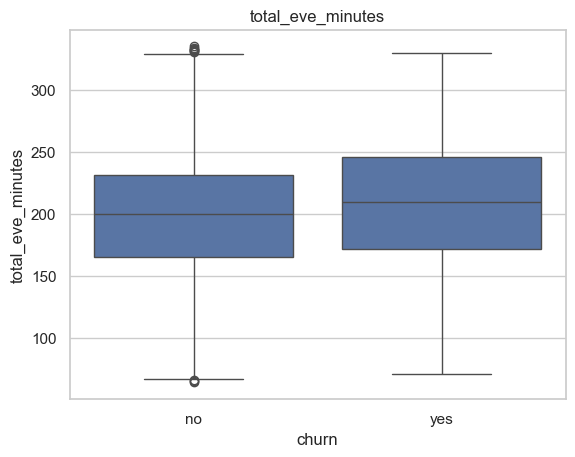

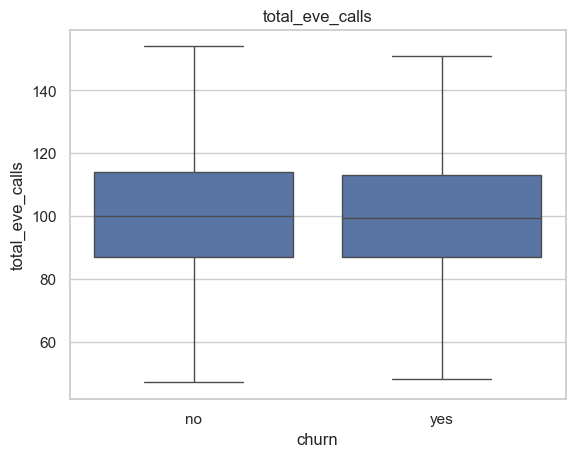

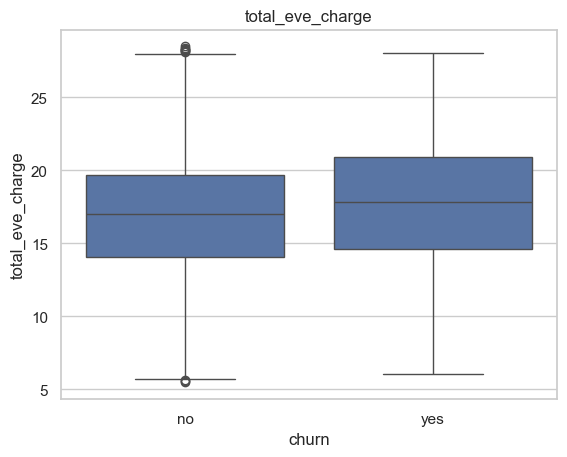

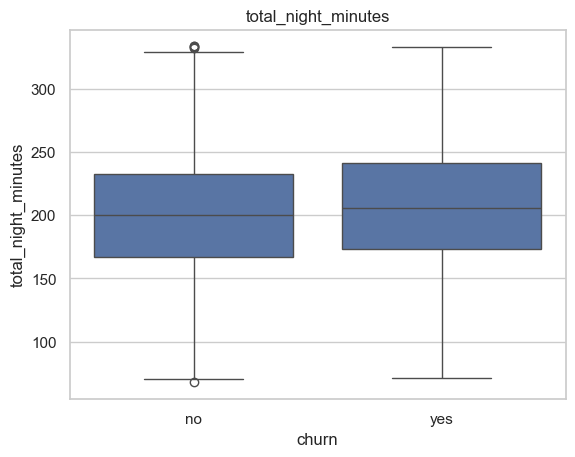

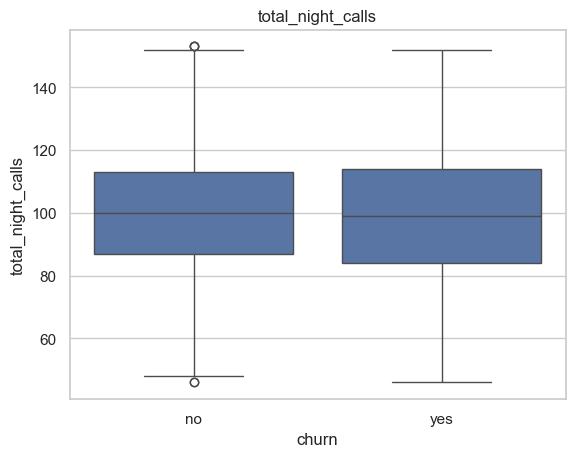

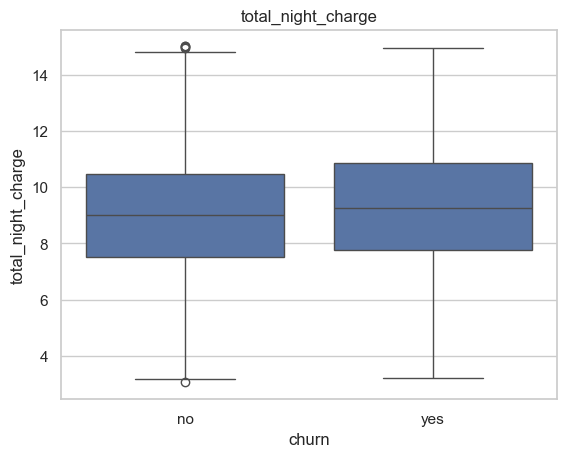

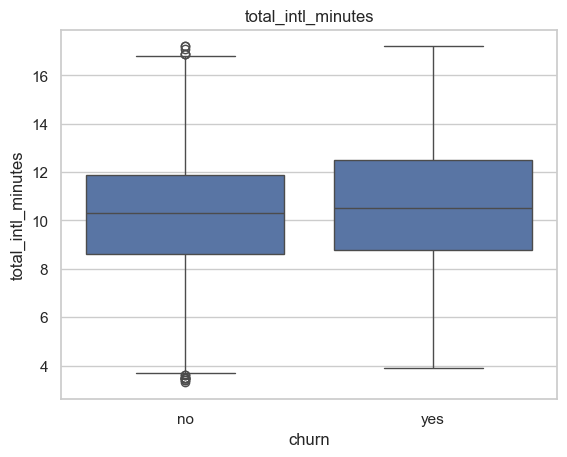

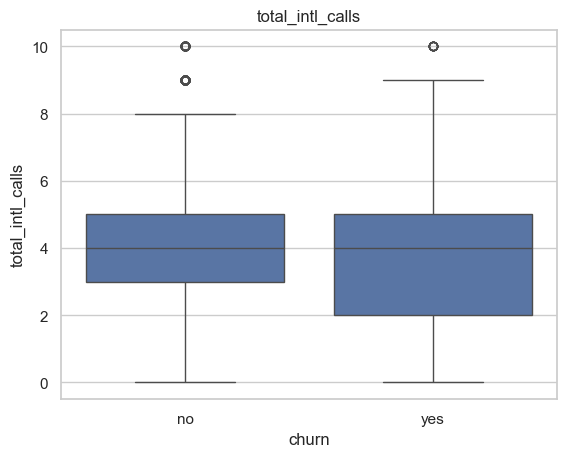

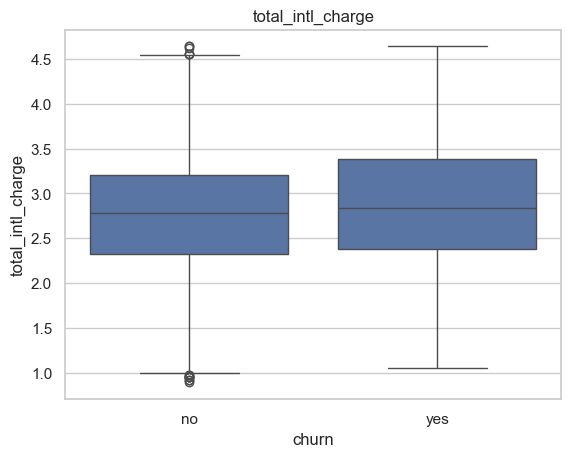

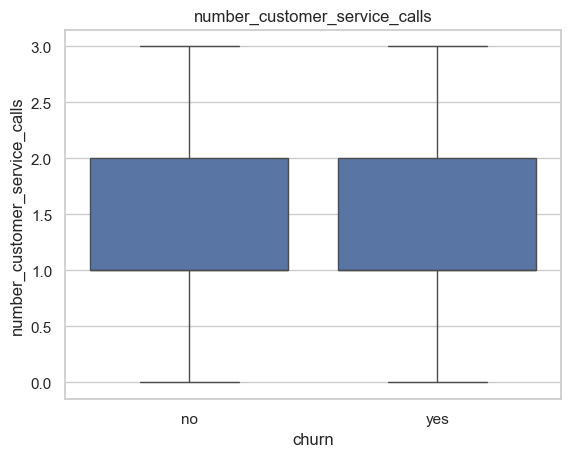

In [52]:
for feature in num_var:
    if feature != 'churn':
        sns.boxplot(x ='churn', y = feature, data = train)
        plt.title(feature)
        plt.show()

### Handling the Categorical Variable

* state feature has 51 different category so we can't converted into onehot encoder that is it create 51 different features so it leads to overfitting so I will use the hashing encoding for state featuer.
*

In [53]:
hash_state = ce.HashingEncoder(cols = 'state')
train = hash_state.fit_transform(train)
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,0,1,0,0,0,0,0,0,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,0,0,0,0,1,0,0,0,84,area_code_408,yes,no,0,299.4,71,50.90,200.7,88,17.06,196.9,89,8.86,6.6,7,1.78,2,no
3,0,0,0,0,1,0,0,0,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,0,0,0,0,1,0,0,0,121,area_code_510,no,yes,24,218.2,88,37.09,200.7,108,17.06,212.6,118,9.57,7.5,7,2.03,3,no


In [54]:
# replace no to 0 and yes to 1
train.international_plan.replace(['no','yes'],[0,1],inplace = True)
train.voice_mail_plan.replace(['no','yes'],[0,1],inplace=True)
train.churn.replace(['no','yes'],[0,1],inplace = True)
train.head()

C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\2452864624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.international_plan.replace(['no','yes'],[0,1],inplace = True)
C:\Users\marwan\AppData\Local\Temp\ipykernel_26680\2452864624.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  trai

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,1,0,0,0,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,0,1,0,0,0,0,0,0,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
2,0,0,0,0,1,0,0,0,84,area_code_408,1,0,0,299.4,71,50.90,200.7,88,17.06,196.9,89,8.86,6.6,7,1.78,2,0
3,0,0,0,0,1,0,0,0,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
4,0,0,0,0,1,0,0,0,121,area_code_510,0,1,24,218.2,88,37.09,200.7,108,17.06,212.6,118,9.57,7.5,7,2.03,3,0


In [55]:
# converting the area_code to numerical variable using one-hot encoder
onehot_area = OneHotEncoder()
onehot_area.fit(train[['area_code']])

# Train
encoded_values = onehot_area.transform(train[['area_code']])
train[onehot_area.categories_[0]] = encoded_values.toarray()
train = train.drop('area_code', axis=1)


In [56]:
train.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_408,area_code_415,area_code_510
0,0,0,0,0,1,0,0,0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0.0,1.0,0.0
1,0,1,0,0,0,0,0,0,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0.0,1.0,0.0
2,0,0,0,0,1,0,0,0,84,1,0,0,299.4,71,50.90,200.7,88,17.06,196.9,89,8.86,6.6,7,1.78,2,0,1.0,0.0,0.0
3,0,0,0,0,1,0,0,0,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0.0,1.0,0.0
4,0,0,0,0,1,0,0,0,121,0,1,24,218.2,88,37.09,200.7,108,17.06,212.6,118,9.57,7.5,7,2.03,3,0,0.0,0.0,1.0


### Handling the Imbalanced dataset

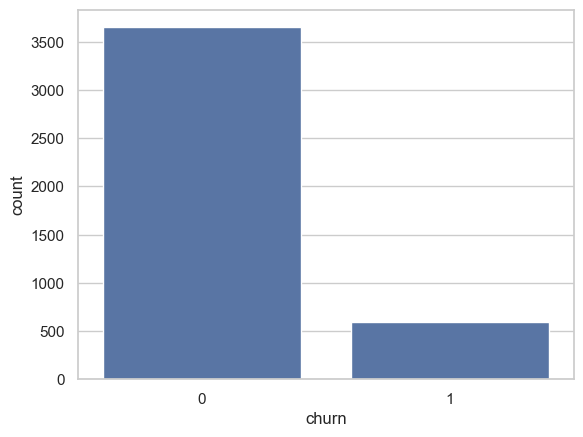

In [57]:
# showing the imbalanced class
sns.countplot(x = 'churn', data = train)
plt.show()

* 0 represent the no churn and 1 represent the churn so there are huge difference in the class. so we need to balanced the dataset
* We have to use upsampling for handling the dataset

In [58]:
x = train.drop('churn',axis=1).values
y = train.churn.values
# spliting the data into test and train
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size=0.3, random_state=0)

In [59]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)   
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())
                                         
print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 2550
Before upsampling count of label 1 425


C:\Users\marwan\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


After upsampling count of label 0 2550
After upsampling count of label 1 2550


* after apply the upsampling technique the number of samples of both classes are same

### Scalling the dataset

In [60]:
# creating the object of minmax scaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Building the model

#### Support Vector Classification

In [61]:
svc = SVC(kernel='rbf', decision_function_shape='ovr')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.8690196078431373
Classification report: 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1102
           1       0.69      0.06      0.12       173

    accuracy                           0.87      1275
   macro avg       0.78      0.53      0.52      1275
weighted avg       0.85      0.87      0.82      1275

Confusion Matrix
[[1097    5]
 [ 162   11]]
Cohen kappa score: 
0.09562561852539309


#### Random Forest Classifier

In [62]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.9270588235294117
Classification report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1102
           1       0.97      0.48      0.64       173

    accuracy                           0.93      1275
   macro avg       0.94      0.74      0.80      1275
weighted avg       0.93      0.93      0.92      1275

Confusion Matrix
[[1099    3]
 [  90   83]]
Cohen kappa score: 
0.605366943012424


### XGBClassifier

In [63]:
clf = XGBClassifier(max_depth=7, n_estimators=200, colsample_bytree=0.7, 
                        subsample=0.8, nthread=10, learning_rate=0.01)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))

Accuracy: 
0.9247058823529412
Classification report: 
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      1102
           1       0.98      0.46      0.62       173

    accuracy                           0.92      1275
   macro avg       0.95      0.73      0.79      1275
weighted avg       0.93      0.92      0.91      1275

Confusion Matrix
[[1100    2]
 [  94   79]]
Cohen kappa score: 
0.586240467304884
